### Introduction

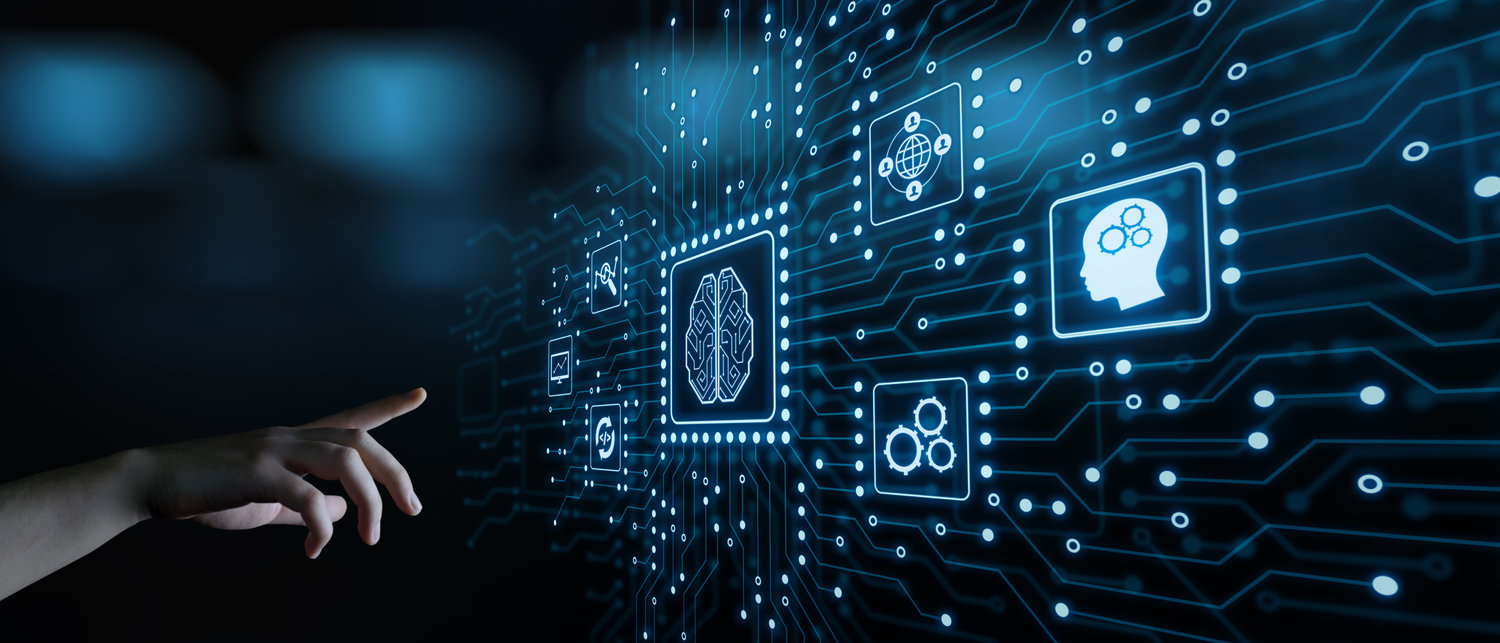

In [2]:
import os
from IPython.display import Image
PATH = ("/Users/lauragarciamasip/Desktop/Python/")
Image(filename = PATH + "Artificial_intelligence.jpeg", width=900, height=900)

In this analysis we investigate what factors affect or drive the most, revenue (y). We can analyse past marketing campaigns and suggest which one works better, suggest changes and optimisation, or suggest how much money to invest or is possible to produce.

For that, we make revenue predictions, given specific variables values. 
We first gather all the possible data related to revenue e.g. visitors, marketing spend, etc. (In this notebook, we don't include the independent variables data collection or explanation on why these variables may affect revenue. We start directly loading the the raw data.)  

After gathering the data, we start the data processing, investigating distribution of our data, normalize data if needed, scale data if needed it. We also investigate the relationship or correlation among the data and importance identification of the variables affecting y (variable selection). Subsequently, we do the data cleaning post-visualization, such as deleting data you don't need, outliers, merging datasets, data aggregation or summing, transforming categorical data, etc. Balance and imbalance dataset would also be a part of the data preparation but we don't need to include it as we apply a linear regression, and hence try to predict a class but a number.

### Methodology applied

In this analysis we work with two types of models or algorithms types. We principally use a linear regressiont but we also use classification which is a way method of predicting a class. The classification method we are using in this case, is decision tree.

Given that we are creating machine learning we only feed the model with part of the data and test if the model can predict the rest. E.g. we only put 80pct of the data (trainig data), algorithm learns from this 80 pct and shuold able to predict the 20pct left, which is unseen data for the model. This is why we split the data (train/test).

At evaluation, we provide the other 20pct left (not incuding the y variable, although we have the actual y variable) and compare the model output to the actual y to see how good the model is).

### Import libs

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

raw_data = pd.read_csv('/Users/lauragarciamasip/Desktop/Python/REGRESSIONS_machinelearning_subsetAI/MODEL1/Model1_Mk_Raw Data.csv')

print(raw_data.shape)

(185, 11)


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             185 non-null    object 
 1   Week             182 non-null    float64
 2   Week_ID          182 non-null    float64
 3   Month            182 non-null    float64
 4   Month_ID         182 non-null    float64
 5   Year             182 non-null    float64
 6   Day_Name         182 non-null    object 
 7   Visitors         182 non-null    float64
 8   Revenue          182 non-null    float64
 9   Marketing Spend  182 non-null    float64
 10  Promo            182 non-null    object 
dtypes: float64(8), object(3)
memory usage: 16.0+ KB


In [5]:
print(raw_data.dtypes)

Date                object
Week               float64
Week_ID            float64
Month              float64
Month_ID           float64
Year               float64
Day_Name            object
Visitors           float64
Revenue            float64
Marketing Spend    float64
Promo               object
dtype: object


In [29]:
raw_data.head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo


### Pre-Process Dataset

##### Null values

In [30]:
raw_data.isnull() 
raw_data.isnull().sum() #nulls by columns summary

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [31]:
raw_data[raw_data['Week'].isnull()] #see by column Week is null. out, row 182,183,184

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We obtain that the whole rows are null values. That's not so usual, usually we miss only couple values.

In [32]:
raw_data = raw_data.dropna()  #If you only wanna drop Na from one column i.o. whole df: raw_data = raw_data.dropna(subset = ['column']]

#raw_data = raw_data.fillna(0) #if wanted to replace na by 0

##### Unique values

In [33]:
#print lenght values if its > 10, else print these values. this is a loop:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals) #to count the unique values in each column (nr=number)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :182
The number of values for feature Week :28
The number of values for feature Week_ID :28
The number of values for feature Month :7 -- [ 1.  2.  3.  4.  5. 11. 12.]
The number of values for feature Month_ID :7 -- [11. 12. 13. 14. 15. 16. 17.]
The number of values for feature Year :2 -- [2020. 2021.]
The number of values for feature Day_Name :7 -- ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of values for feature Visitors :175
The number of values for feature Revenue :181
The number of values for feature Marketing Spend :182
The number of values for feature Promo :3 -- ['No Promo' 'Promotion Blue' 'Promotion Red']


### Data visualization

#### Relationship continuos variables (scatterplot) and distribution data (diagonal row)

Before modeling the data,we visualise it to see if there is a relationship between the variables. A good way to do this, is using a scatterplot where we can observe the distribution of the data points. For instance, we can observe a relationship when we see that returnt (y) when x increases. In this case, a linear regression would make sense. Differently, if we saw there was a relation up to certain point and at some point the return (y) dimisnishes, a linear regression wouldn't make sense, maybe a ploynominal regression could be applied. We can also see if there is any relationship at all and observe outliers.

g is gonna compare all numeric features (not categorical) with each other, not ideal for big dataset. 

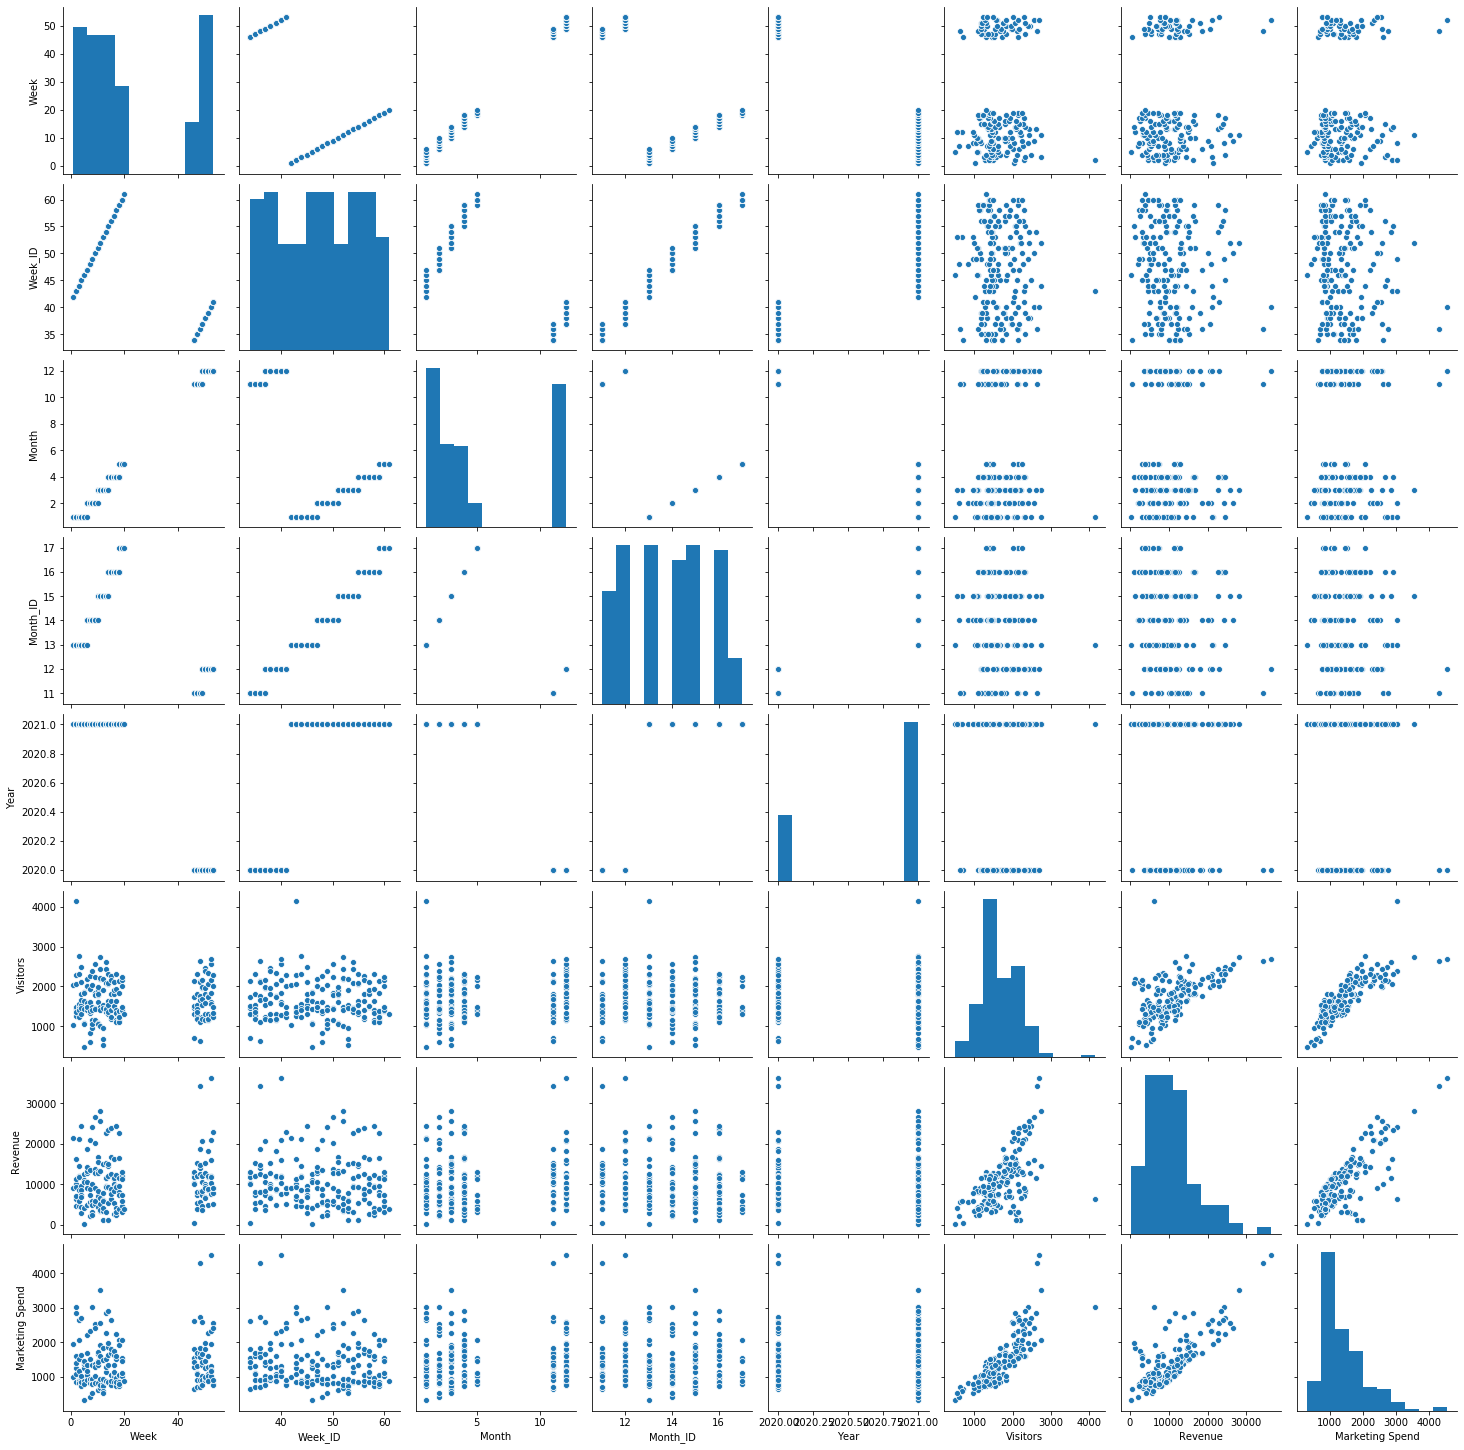

In [7]:
g = sns.pairplot(raw_data)

in the diagonal in the middle we have the distribution of our data. in the first 5 columns (until year), its not somethiing we really wanna investigate because they are only datetime columns.
i mean, you can oserve things like there are most of the week data in year 2021. etc but not really interesting.
Regarding distribution (mid diagonal) observing variables of our interest, distribution we see revenue, visitors, mk spend has a more left sekwed distribution (so-called right skewed).
Regarding relationship, we see a relationship on mk spend vs visitors and in mk spend and revenue.

What are the types of distribution?



Probability distributions

Normal distribution most known, used to model many things and most knwonw for modelling uncertainty and error.thanks to something called the central limit theorem.

There are many distribution THAT BECOME NORMAL DISTRIBTUIONS IF WE PARAMETRUZE THEM CORRECTLY

 

 
 
Bernoulli Distribution.

Uniform Distribution.(I think I get a lot this one)

Binomial Distribution.

Normal Distribution.

Poisson Distribution.

Exponential Distribution.

 

Non normal distributed data: its like no probabl

Too many extreme values in a data set will result in a skewed distribution. Normality of data can be achieved by cleaning the data. This involves determining measurement errors, data-entry errors and outliers, and removing them from the data for valid reasons.

 

 

 

Histograms (one way to visualize distributions)

skewness and Kurtosis

A distribution is skewed if one of its tails is longer than the other. The first distribution shown has a positive skew

 

Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

We visualize the same only on the variables of our interest, and we observe it by promotion cathergory and make size bigger:

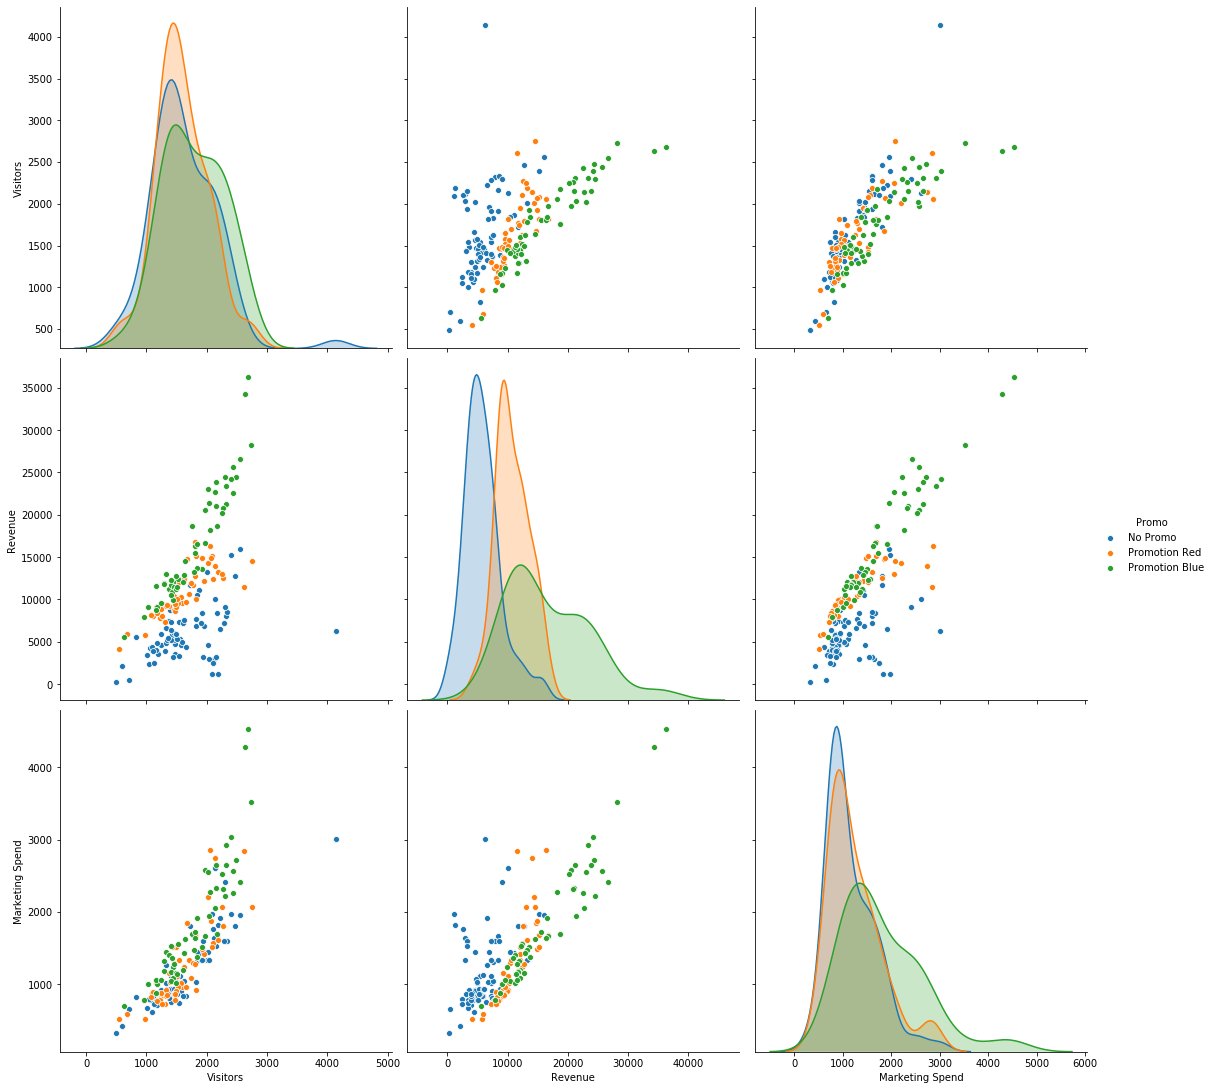

In [8]:
g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], 'Promo', height = 5)

We observe there are relationship and we the promotions perform differently. In the plot of revenue vs mk spend, we see that the more mk we spend, the higher is the revenue, especially for promotion blue (green dots). For no promo, if we spend 3000 mk spend, we exepect to generate 10k of revenue. For promotion red (orange), we expect around 15k and for promotion blue (green), we expect to generate around 25k. 
We would hence, already see that no promo and promo red do not generate so much money, based on mk spend.

We observe same relationship now by "date name":

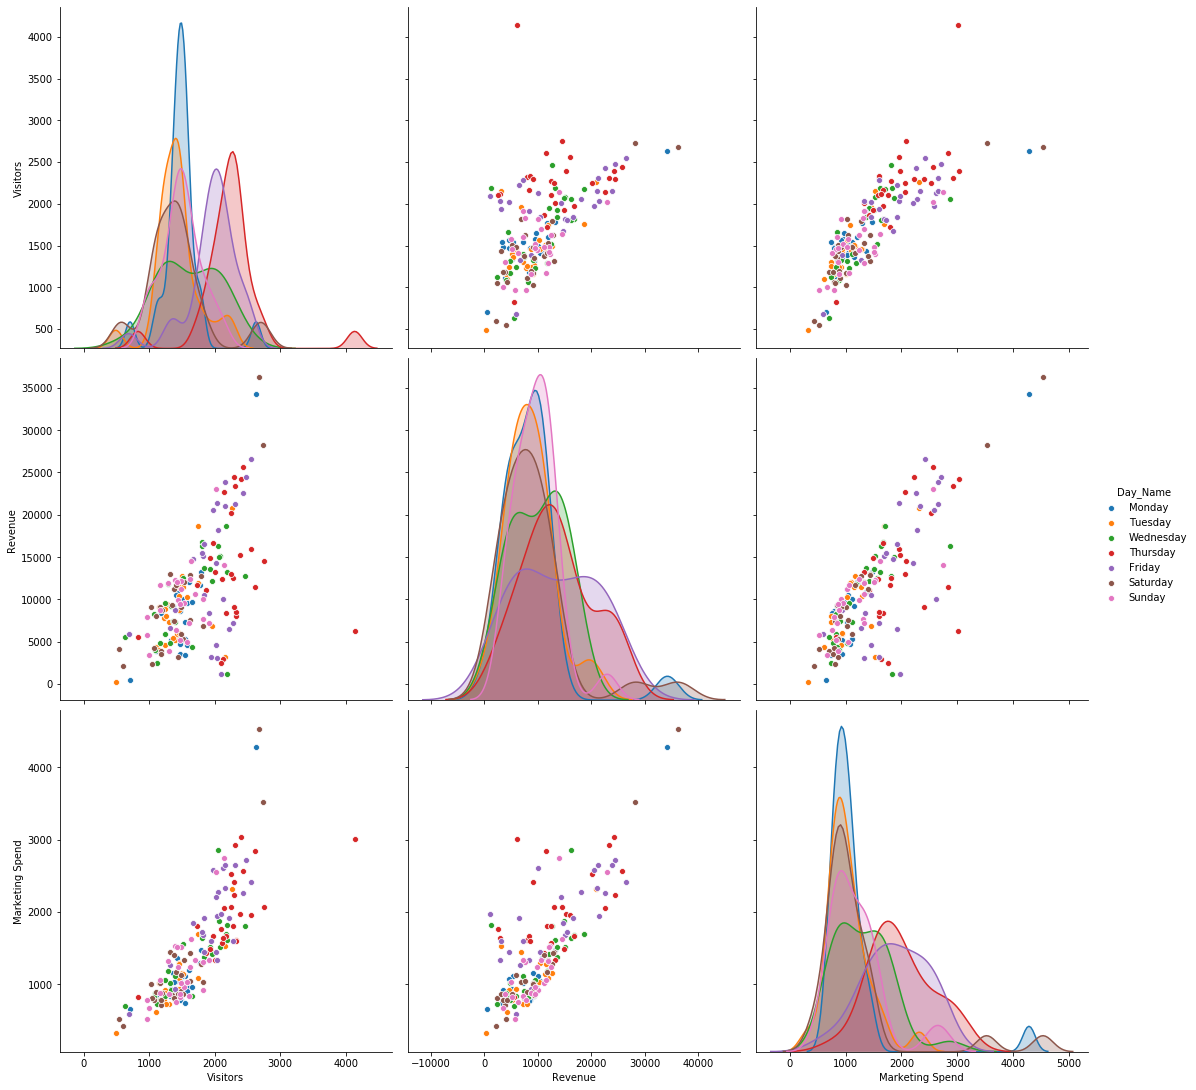

In [10]:
g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Day_Name']], hue = 'Day_Name', height = 5)

So many categories (data name) makes the plots difficult to interpret. We hence, we create also sublots, one plot per day and we only observe relationship mk spend vs revenue, because we saw it's the one we are most interested in.

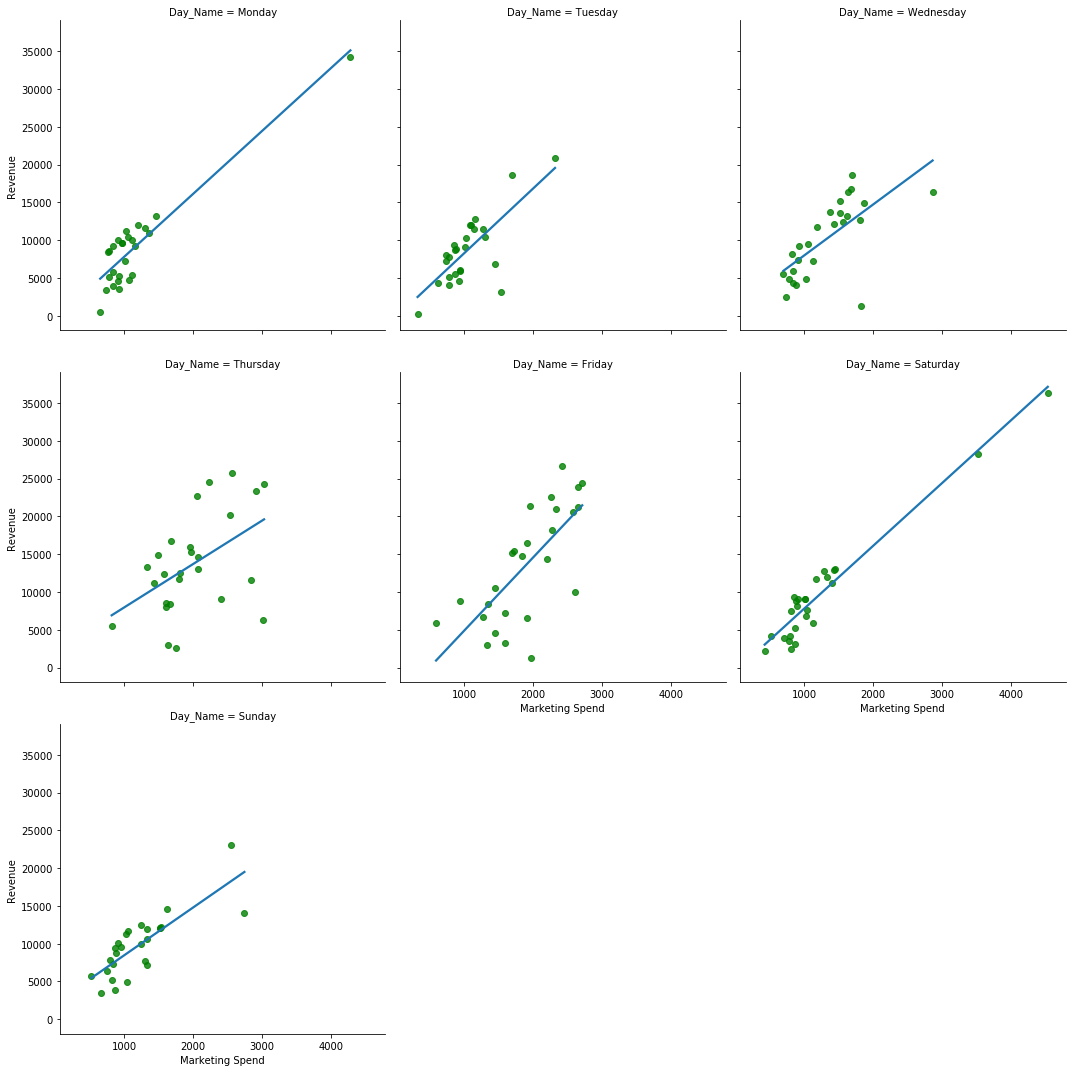

In [9]:
g = sns.lmplot(x = 'Marketing Spend' , y = 'Revenue', data = raw_data, col = 'Day_Name', col_wrap = 3, height = 5, 
              scatter_kws = {'color':'green'}, ci = False) #wrap in order to have the plots in groups of 3 instead of a line, and we do a bigger size, and remove confidence internval (ci)..

We can see that every single day has day has a strong relationship, data is performing, so we should keep day_name in my data, and has an impact to revenue. and of course regarding the observed relationship, the more mk spend, the more revenue.

#### Distribution revenue by categorical v.

Now we will observe the distribution of revenue by the categorial values, (mainly, day_name and promo) using a box plot, not lm plot.

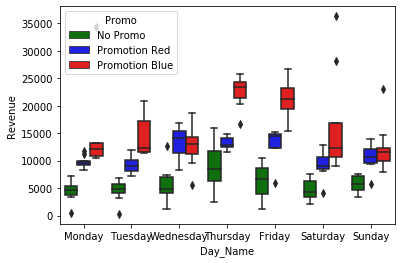

In [15]:
pal = ["green", "blue", "red"]
g = sns.boxplot(x = "Day_Name", y = "Revenue", data = raw_data, hue = "Promo", palette = pal)

Line in the middle is the media, the beginning of the box is beginning of the 75%percentle the end, ending of the 75% percentile. The fots are the outliers.

##### Outliers drop_method1

We observe the outliers from the lm.plot by day_name and the ones from the box.plot. See in the box plot and lm.plot that monday and satyrady they have outliers that are places over 27k revenue:

In [13]:
raw_data = raw_data[raw_data['Revenue'] < 27000]
raw_data.shape

(179, 11)

##### Outliers drop_method2

In [ ]:
Outliers (visually , sklearn)

From sklearn.neighbors import LocalOutlierFactor

 

Lof = localOutlierFactor(n_neighbors=20, contamination=0.01)

Good = lof.fit_predict(d2) > 0.5

Plt.scatter(d2[good, 0]

Plt.scatter(d2

Plt.legend()

In [18]:
# Selecting the columns ill use only, i could also create a new dataframe with them :D. 
raw_data = raw_data[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]
raw_data.head()

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375,No Promo
1,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750,No Promo
4,Friday,2134.0,10000.0,2614.500,No Promo


##### Categorical  into "dummies" values 0/1 with get dummies from pd

In [19]:
new_raw_data = pd.get_dummies(raw_data, columns = ['Promo', 'Day_Name'])
#we could also use Label Encoding and OneHotEncoder from the preprocessing library
new_raw_data.head()

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500,1,0,0,1,0,0,0,0,0,0


#### Correlation (feature importance, only on continuos variables not dummies)

We study the variables' correlation to filter the variables that have considerable relationship with the depedendent variable, revenue. That can save computational work for our machine learning algorithm. 

In [20]:
new_raw_data[['Visitors','Revenue','Marketing Spend']].corr() 

,Visitors,Revenue,Marketing Spend
Visitors,1.000000,0.531602,0.837313
Revenue,0.531602,1.000000,0.725675
Marketing Spend,0.837313,0.725675,1.000000


.corr() is used to find the correlation of all columns in the dataframe. Any null values are automatically excluded. The correlation coefficient ranges from -1 to 1, the closer to 1 or -1, the stronger the relationship (meaning, as one varibles increases other also increases / deacreses  too). +- 0.8 is Strong correlation, 0.6 to 0.8 is moderate Correlation, for the rest of the values, there is no correlation. (High correlation doesnt mean necessarlity causation).

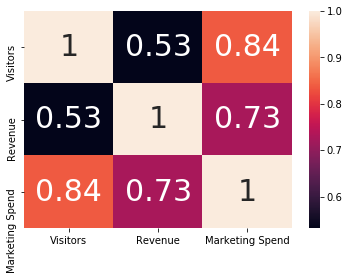

In [21]:
hm = new_raw_data[['Visitors','Revenue','Marketing Spend']].corr() 
g = sns.heatmap(hm, annot = True, annot_kws={'size':30}) #heatmap visualisation, we don't change colors.

The more mk we spend, the more visitors, and the more mk spend, the more revenue. We also see there is no correlation between revenue and visitors.

### Define x and y variables (ind/dependent) (Split the data into x & y)

Indepentend variables into x (all data except from revenue).

In [38]:
X = new_raw_data.drop('Revenue', axis = 1).values #If you wanna pass data into an algorithm, you have to put X into values.
# and then see we obtain and array if we print it in the console, not a dataframe!!
X2 = new_raw_data.drop('Revenue', axis = 1)

Dependent variable

In [39]:
y = new_raw_data['Revenue']

print(X.shape)
print(y.shape)

(179, 12)
(179,)


#### Decision tree (feature importance, different method than correlation and including categorical variables)

Tree-based estimator (i.e. decision trees & random forests)
entropy bc variables imporatance is based on maximizing information gain and minimize entrop
random_state so we can replicate the results 
criterion entropy because because of the minimization of entropy when doing the feature importance


In [40]:
# Tree-based estimator (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y) 

# The importance of a feature is calculated as the (normalized) total reduction of entropy (other criterions too) brought by that feature or the higher information gain
for i, column in enumerate(new_raw_data.drop('Revenue', axis = 1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

The feature importance for Visitors is: 0.332
The feature importance for Marketing Spend is: 0.438
The feature importance for Promo_No Promo is: 0.032
The feature importance for Promo_Promotion Blue is: 0.047
The feature importance for Promo_Promotion Red is: 0.045
The feature importance for Day_Name_Friday is: 0.013
The feature importance for Day_Name_Monday is: 0.014
The feature importance for Day_Name_Saturday is: 0.013
The feature importance for Day_Name_Sunday is: 0.016
The feature importance for Day_Name_Thursday is: 0.020
The feature importance for Day_Name_Tuesday is: 0.017
The feature importance for Day_Name_Wednesday is: 0.013


We interpret the results as follows: the highest feature importance for revenue is marketing spend. (.4) Promotion blue is the most imporant, and thursday is the most important day. In this analysis we are not gonna exclude any variable because we dont have so many but in the case we had thousands of variables, we should exclude some.

### Splitting into test&train. (for x and y) - Hold-out validation

For this linear regression we use hold-out validation although for other we use cross validation.
We create 4 subsets of data. In this case we'll make a split (test/training) between 80% and 20%

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 12)
(36, 12)
(143,)
(36,)


### Linear regression (relationship/causation)

Linear regression is a widely used machine learning model that predicts continues numbers as outputs; not classes. 

#### Summary statistics and more data characterization

In [8]:
raw_data.describe()

,Week,Week_ID,Month,Month_ID,Year,Visitors,Revenue,Marketing Spend
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,21.785714,47.351648,5.269231,13.774725,2020.708791,1666.730769,10581.593407,1396.356564
std,18.369841,7.892053,4.204580,1.783540,0.455573,503.528049,6297.626426,691.867416
min,1.000000,34.000000,1.000000,11.000000,2020.000000,488.000000,292.000000,322.000000
25%,8.000000,40.000000,2.000000,12.000000,2020.000000,1339.000000,5929.500000,880.431250
50%,14.000000,48.000000,4.000000,14.000000,2021.000000,1546.000000,9452.000000,1223.900000
75%,47.000000,54.000000,11.000000,15.000000,2021.000000,2027.500000,12959.500000,1676.450000
max,53.000000,61.000000,12.000000,17.000000,2021.000000,4139.000000,36283.000000,4535.375000


Percentiles

Really data vector into a ery short data vector by creating a Data verctor that conatins the percentiles. Percentiels go from 0 to 100%. you can pass your data into percentailes. We can make any precision we want

We plot the percentiles and the x. 10th percentail etc. .. in the tails we see difference with the data and percentails. We can adapt it depending on which distribution of the data we have.

So percentaailes are very good at gathering certain distributions.

In [12]:
raw_data.groupby("Revenue").mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1a1d541090>>

#### Run regressionm (Training the Regression)

We initialize the lm model and call it subsquently: lm.fit. in which I fit my training data for x and y.
Finally, with y_pred we are predicting the y values (most important step).

In [42]:
lm = LinearRegression(fit_intercept = True) #intercept to make some predictions afterwards.
lm.fit(X_train, y_train) 
y_pred = lm.predict(X_train)

In [43]:
y_pred.shape #(those are the predicted values with same lenght, 143 results)

(143,)

### Evaluation (R2). With sklearn

#### R2 training and testing data (Model Accuracy)

One of the most famous evaluations for regressions is the Rsquare. We apply this score only on the traning data set.

In [44]:
#training
print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy n2  on the training dataset is: ',r2_score(y_train,y_pred) )   
print("")

# testing 
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )
print("")

#Another way of predicting R2 is with sklearn.metrics.r2_score.

The Accuracy  on the training dataset is:  0.791949990505602
The Accuracy n2  on the training dataset is:  0.791949990505602

The Accuracy  on the testing dataset is:  0.7511903865386681



The accuracy score represents the coefficient of determination ( 𝑅2 ). R2 is measure of how close the data are to the fitted regression line. R2 is max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

In this case we can say that our model explains 79% of the training data. 
For the testing data, model explains 75% of the testing data. That means it dropped from 79% to 75% which is normal becasue in the testing data, the model uses unseen data. 

#### Mean squared error

In [31]:
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))
print("")

The RMSE  on the training dataset is:  2618.561282656437
The RMSE  on the testing dataset is:  2340.4200873490113



The Root Mean Squared Error measure differences between values predicted by a model/estimator and values observed. Effectively, it's the standard deviation of the residuals (residuals are difference predicted values-regression line). Hence it's measure of how spread your residuals are.

We see the means squared error has dropped on the unseen data.

#### Mean absolute error

In [32]:
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))
print("")

The MAE  on the training dataset is:  1928.0670665528864
The MAE  on the testing dataset is:  1692.38355771623



MAE is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred). It is the amount of error in your measurements.

We see the means squared error has dropped on the unseen data, which is better as it means that on average, and each product and prediction, you are around 1690 dollars off.

#### Coefficients and intercept

In [33]:
print('Coefficients: ', lm.coef_ )
print("")

print('Intercept: ', lm.intercept_)

Coefficients:  [ 9.72168996e-01  3.69561477e+00 -4.29587654e+03  3.72469059e+03
  5.71185949e+02  7.38005738e+02 -3.52308895e+02 -9.02241594e+02
 -1.55867567e+02  8.14821481e+02  1.50084913e+02 -2.92494076e+02]

Intercept:  4060.650366499687


Coeff are the weights and correspond to all our independent variables. (12 variables)
The intercept is the expected mean value of Y when all X=0. 

We will use the intercept and coeff. later on to make predictions. 

#### Plot Actuals vs Predicted (how good the model is)

Text(0.5, 1.0, 'Actuals Vs Predicted Values')

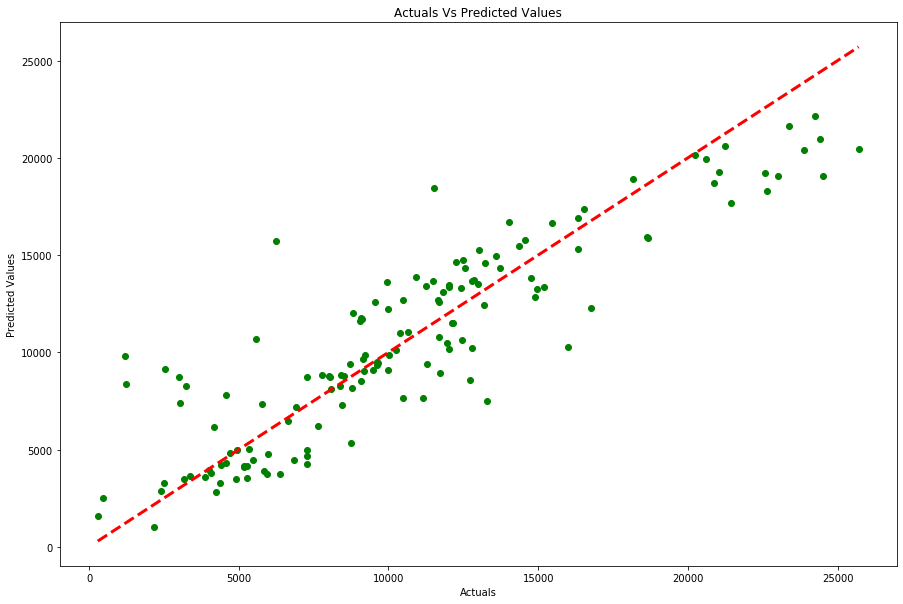

In [34]:
plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')

The red line is not the regression line but it is just perfect line which makes it easier to interpret the results: where the actuals are 5000, the predicted are also 5000 in the line. Hence, the closer the data points to the line, the better the model is. For example, we see an actual of around 5000 but the predicted has a value over 15000.

#### Plot Residuals

Index(['Visitors', 'Marketing Spend', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'],
      dtype='object')

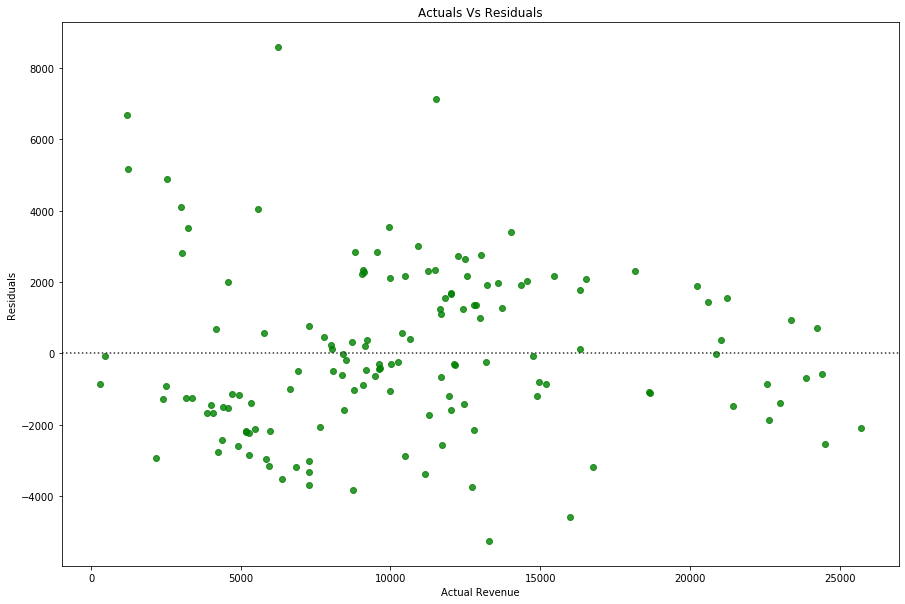

In [62]:
plt.figure(figsize=(15,10))

sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

X2.columns

The further the points are to the line, is how far our prediction was. For instance,  we got our prediction wrong for 5000 dollars. and we can also say where is our concentration data point. (mostly -2000 an 2000), which corresponds to the values we saw in RMSE values. 

Hence, we will now drop the outliers and re-run our model to see if we can improve our predicions.
We should add also, that the residuals we obtained are not so bad, and we will continue with the process without trying to improve the model.

### Making predictions, using the l. regression

we create or coeffcieints into a dataframe. We do so with column names so we know which coefficient corresponds to every feature. 

I know need the columns, so we need the column names of the x variables. So we use same line we did when creating our x, but we create x2, and we cannot use .values here. 

In [63]:
X2 = new_raw_data.drop('Revenue', axis = 1)

In [64]:
X2 # we see how it looks

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,651.375000,1,0,0,0,1,0,0,0,0,0
1,1455.0,1298.250000,0,0,1,0,0,0,0,0,1,0
2,1520.0,1559.375000,0,1,0,0,0,0,0,0,0,1
3,1726.0,1801.750000,1,0,0,0,0,0,0,1,0,0
4,2134.0,2614.500000,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1400.0,1119.600000,1,0,0,0,0,0,0,0,0,1
178,2244.0,2067.888889,0,0,1,0,0,0,0,1,0,0
179,2023.0,1450.200000,1,0,0,1,0,0,0,0,0,0
180,1483.0,1121.875000,1,0,0,0,0,1,0,0,0,0


In [65]:
X2.columns #columns name, see how it looks

Index(['Visitors', 'Marketing Spend', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'],
      dtype='object')

We then, put values of the coefficients on the x columns:

In [66]:
Coeff = lm.coef_
Coeff.shape

(12,)

In [67]:
Coeff = Coeff.reshape(-1,12) #reshaping, we have 12 coefficients 

Coeff_df = pd.DataFrame(Coeff, columns = [X2.columns]) # Creating a Dataframe

Coeff_df

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,0.972169,3.695615,-4295.87654,3724.69059,571.185949,738.005738,-352.308895,-902.241594,-155.867567,814.821481,150.084913,-292.494076


#### Create data set for regression

#### Prediction formula, linear regression: 

We use the training variables to make a prediction. We fill the x with random values: Friday, promotion red, 8000 and 5000.

In [68]:
Day = 'Day_Name_Friday'
Visitors = 8000
Marketing_Spend = 5000
Promo = 'Promo_Promotion Red'

y = a + bx + ..   
(a = intercept,  b = day (first coefficient), b1= second coefficient, ... and x = coefficient of engine size)

In [69]:
pred1 = (lm.intercept_) + (Coeff_df[Day].values[0] * 1) + (Coeff_df['Visitors'].values[0] * Visitors) + (Coeff_df['Marketing Spend'].values[0] * Marketing_Spend) + (Coeff_df[Promo].values[0] * 1)
#in b's need the values, and i select the first value, 0.
#I do it times 1 for the categorial variabes (Day name and Promo)

print('The predicted Revenue is: ', pred1)

TypeError: only integer scalar arrays can be converted to a scalar index

The predicted revenue obtained is ..
so we can use that model to say , next week we will have around 89798 visitors, and we will use that mk spend. so we are aablet to predict how much we will gonna make in revenue.